1.

Proszę zaproponować swoją implementację algorytmu genetycznego w celu znalezienia maksimum funkcji $f(x) = cos(100x+0.1) + 4x^{-x}-3$ w przedziale $[0,1]$, dla $x=0$ proszę przyjąć $f(x) = 0$. Proszę porównać działanie algorytmu:

* Dla kodowania w naturalnym kodzie binarnym i w kodzie Graya

* Dla szansy mutacji wynoszącej 0, 0.1, 0.5 i 1.0

* Dla selekcji ruletkowej i dla selekcji progowej. W selekcji progowej dzielimy populację na dwie grupy: na $\gamma$% najlepszych i na pozostałych. Osobniki w grupie $\gamma$% najlepszych mają równą szansę na reprodukcję, pozostałe mają zerową szansę na reprodukcję. Proszę sprawdzić wyniki dla $\gamma$ wynoszącego 20 i 50.

Za każdym razem proszę podać średnie wyniki dla 10 wywołań algorytmu i przedstawić przykładowe przebiegi algorytmu na wykresach (dla jednego z wywołań).

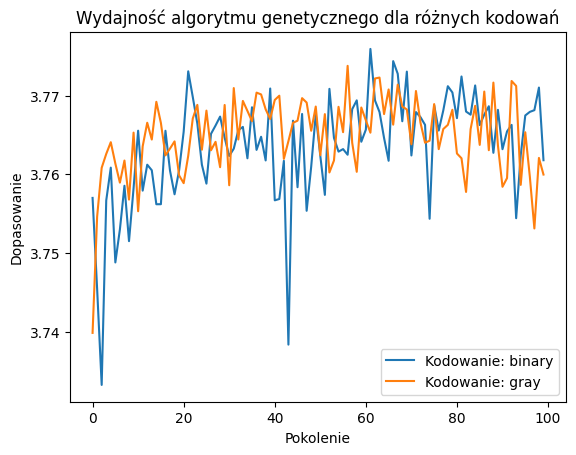

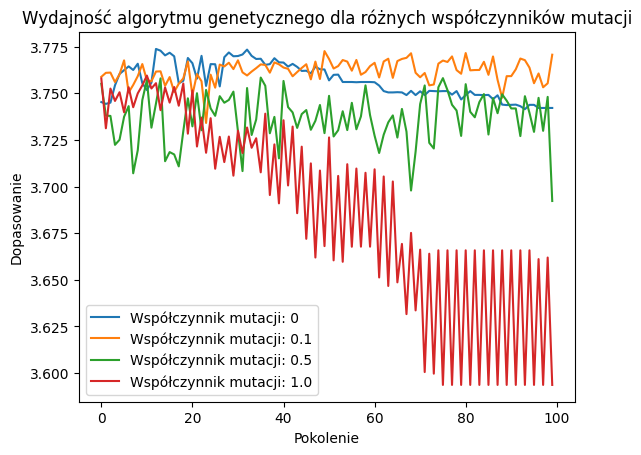

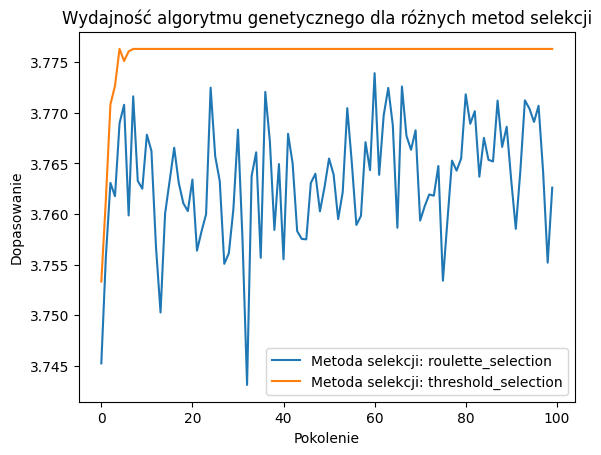

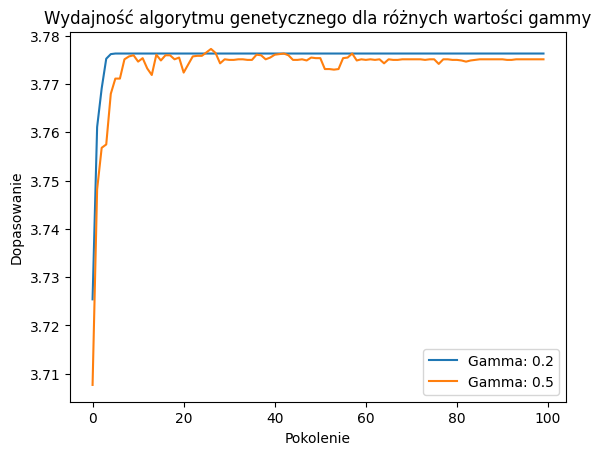

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.cos(100*x+0.1) + 4*x**(-x) - 3 if x != 0 else 0
def binary_to_decimal(binary, n_bits):
    return np.sum([binary[i] * 2**(n_bits-i-1) for i in range(n_bits)]) / (2**n_bits - 1)
def gray_to_binary(gray):
    binary = gray.copy()
    for i in range(1, len(gray)):
        binary[i] = binary[i-1] ^ gray[i]
    return binary
def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual
def roulette_selection(population, fitness, gamma=0.1):
    return population[np.random.choice(len(population), p=fitness/fitness.sum())]
def threshold_selection(population, fitness, gamma=0.1):
    sorted_indices = np.argsort(fitness)
    threshold = int(gamma * len(population))
    best_indices = sorted_indices[-threshold:]
    return population[np.random.choice(best_indices)]
def genetic_algorithm(f, encoding, mutation_rate, selection, gamma=0.1, n_bits=10, n_generations=100, population_size=100):
    population = np.random.randint(2, size=(population_size, n_bits))
    fitness_history = []
    for _ in range(n_generations):
        if encoding == 'binary':
            fitness = np.array([f(binary_to_decimal(individual, n_bits)) for individual in population])
        elif encoding == 'gray':
            fitness = np.array([f(binary_to_decimal(gray_to_binary(individual), n_bits)) for individual in population])
        fitness_history.append(fitness.max())
        new_population = []
        for _ in range(population_size):
            parent1 = selection(population, fitness, gamma)
            parent2 = selection(population, fitness, gamma)
            child = parent1.copy()
            crossover_point = np.random.randint(n_bits)
            child[crossover_point:] = parent2[crossover_point:]
            new_population.append(mutation(child, mutation_rate))
        population = np.array(new_population)
    return fitness_history
encodings = ['binary', 'gray']
mutation_rates = [0, 0.1, 0.5, 1.0]
selections = [roulette_selection, threshold_selection]
gammas = [0.2, 0.5]
for encoding in encodings:
    fitness_histories = []
    for _ in range(10):
        fitness_history = genetic_algorithm(f, encoding, 0.1, roulette_selection)
        fitness_histories.append(fitness_history)
    mean_fitness_history = np.mean(fitness_histories, axis=0)
    plt.plot(mean_fitness_history, label=f'Kodowanie: {encoding}')
plt.legend()
plt.xlabel('Pokolenie')
plt.ylabel('Dopasowanie')
plt.title('Wydajność algorytmu genetycznego dla różnych kodowań')
plt.show()
for mutation_rate in mutation_rates:
    fitness_histories = []
    for _ in range(10):
        fitness_history = genetic_algorithm(f, 'binary', mutation_rate, roulette_selection)
        fitness_histories.append(fitness_history)
    mean_fitness_history = np.mean(fitness_histories, axis=0)
    plt.plot(mean_fitness_history, label=f'Współczynnik mutacji: {mutation_rate}')
plt.legend()
plt.xlabel('Pokolenie')
plt.ylabel('Dopasowanie')
plt.title('Wydajność algorytmu genetycznego dla różnych współczynników mutacji')
plt.show()
for selection in selections:
    fitness_histories = []
    for _ in range(10):
        fitness_history = genetic_algorithm(f, 'binary', 0.1, selection, gamma=0.2)
        fitness_histories.append(fitness_history)
    mean_fitness_history = np.mean(fitness_histories, axis=0)
    plt.plot(mean_fitness_history, label=f'Metoda selekcji: {selection.__name__}')
plt.legend()
plt.xlabel('Pokolenie')
plt.ylabel('Dopasowanie')
plt.title('Wydajność algorytmu genetycznego dla różnych metod selekcji')
plt.show()
for gamma in gammas:
    fitness_histories = []
    for _ in range(10):
        fitness_history = genetic_algorithm(f, 'binary', 0.1, threshold_selection, gamma)
        fitness_histories.append(fitness_history)
    mean_fitness_history = np.mean(fitness_histories, axis=0)
    plt.plot(mean_fitness_history, label=f'Gamma: {gamma}')
plt.legend()
plt.xlabel('Pokolenie')
plt.ylabel('Dopasowanie')
plt.title('Wydajność algorytmu genetycznego dla różnych wartości gammy')
plt.show()

**Wnioski:**
Kodowanie Gray'a przyniosło bardzo podobne wyniki jak kodowanie binarne.

Wysoki współczynnik mutacji może prowadzić do błędnego poszukiwania porządanej mutacji która już mogła być odnaleziona.

Selekcja ruletkowa jest bardziej zrównoważona niż selekcja progowa. Daje szansę na reprodukcję wszystkim osobnikom, nie tylko tym najlepszym.

W selekcji progowej, gamma kontroluje równowagę między poszukiwaniem nowych rozwiązań (eksploracją) a wykorzystaniem znanych (eksploatacją). Niska gamma skupia się na eksploatacji, wysoka na eksploracji.

2.

W naszej firmie są cztery działy: A, B, C i D. Generują różne zyski i różne koszty utrzymania, a ich efektywność jest wzajemnie od siebie zależna. Maksymalna ilość pracowników w każdym dziale przy obecnych warunkach to 255 ze względu na ograniczenia budżetu i przestrzeni biurowej. Funkcja miesięcznego zysku (po uwzględnieniu kosztów) w zależności od zatrudnionych w każdym dziale pracowników ma postać:

$Z(A, B, C, D) = \frac{600(A-20)^2(B-35)^2}{C}-(A-50)^2(D-48)^2+D$ tys. dolarów

Proszę zaproponować algorytm genetyczny (kodowanie problemu może być binarne, rzeczywistoliczbowe lub całkowitoliczbowe) i zaproponować wartość (A, B, C, D), dla której zyski firmy będą jak największe.

In [10]:
import numpy as np
def Z(A, B, C, D):
    return 600*(A-20)**2*(B-35)**2/C - (A-50)**2*(D-48)**2 + D
def binary_encoding(x, n_bits):
    required_bits = len(bin(x)) - 2
    bit_width = max(required_bits, n_bits)
    return np.array([int(b) for b in np.binary_repr(x, bit_width)])
def mutation(individual, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = 1 - individual[i]
    return individual
def threshold_selection(population, fitness, gamma):
    threshold = np.percentile(fitness, gamma * 100)
    return population[np.random.choice(np.where(fitness > threshold)[0])]
def genetic_algorithm(Z, n_bits=8, n_generations=100, population_size=100, mutation_rate=0.1, gamma=0.2):
    n_variables = 4
    population = np.random.randint(2, size=(population_size, n_variables, n_bits))
    for _ in range(n_generations):
        fitness = np.array([Z(*[int(''.join(map(str, individual[i])), 2) + (1 if i == 2 else 0) for i in range(n_variables)]) for individual in population])
        new_population = []
        for _ in range(population_size):
            parent1 = threshold_selection(population, fitness, gamma)
            parent2 = threshold_selection(population, fitness, gamma)
            child = parent1.copy()
            crossover_point = np.random.randint(n_bits)
            for i in range(n_variables):
                child[i, crossover_point:] = parent2[i, crossover_point:]
                child[i] = mutation(child[i], mutation_rate)
            new_population.append(child)
        population = np.array(new_population)
    best_individual = population[fitness.argmax()]
    return [int(''.join(map(str, best_individual[i])), 2) + (1 if i == 2 else 0) for i in range(n_variables)]
fitness_histories = []
for _ in range(10):
    A, B, C, D = genetic_algorithm(Z)
    fitness_history = Z(A, B, C, D)
    fitness_histories.append(fitness_history)
mean_fitness_history = np.mean(fitness_histories)
print(f"Średni zysk po 10 próbach: {mean_fitness_history}")
print(f"Optymalna liczba pracowników w dziale A: {A}, B: {B}, C: {C}, D: {D}")

Średni zysk po 10 próbach: 11506179344.994413
Optymalna liczba pracowników w dziale A: 208, B: 216, C: 41, D: 20


**Wnioski:**

Algorytm genetyczny jest skutecznym narzędziem do optymalizacji złożonych funkcji, takich jak funkcja zysku firmy, która zależy od wielu zmiennych.